# установка и импорт необходимых библиотек

In [ ]:
pip install pandas numpy shap scikit-learn catboost seaborn matplotlib

In [ ]:
import pandas as pd
import numpy as np

import shap
import sklearn
import catboost
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

%matplotlib inline

## небольшие изначальные преднастройки

In [2]:
sns.set_style("darkgrid") # У графиков будет красивая серая подложка. 

# работа с датасетом

## 1.1 вывод данных о датасете

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
# Загружаем датасет по задаче прогнозирования индекса диабета.
data = load_diabetes(scaled=False)
diabetes_df = pd.DataFrame(data.data, columns=data.feature_names)
diabetes_df.insert(10, 'disease_progress', data.target)

с помощью метода `.head()` можно вывести первые строчки датасета

In [5]:
diabetes_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progress
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


с помощью метода `.shape` можно вывести размер таблицы

In [6]:
diabetes_df.shape

(442, 11)

## 1.2 задание

в директории `datasets` лежит файл `students.csv`. Импортируем его

In [58]:
df = pd.read_csv("datasets/students.csv") # Наши данные об учениках
df = df.drop_duplicates()
df

,ФИО,Группа крови,Любимая еда,Наличие публикаций,Наличие золотой медали,Участие в олимпиадах НИУ ВШЭ,Мотивационное письмо,Мечта,Участие в подготовительных курсах НИУ ВШЭ,Частота прогулок,Участие во всероссийских олимпиадах,Хобби,Средний балл ЕГЭ,Участие в волонтерской деятельности,Средний балл аттестата,Любимый цвет,Наличие питомца,Target
0,Козлова Валерия Константиновна,II,Бургер,Да,-,Нет,5,Семья,Да,Редко,Да,Кино,77,Нет,4.944865,Желтый,Да,1
1,Романова Татьяна Сергеевна,I,Суши,Да,Да,Нет,3,Наука,Нет,Редко,Да,Кино,81,Нет,4.057958,Зеленый,Нет,1
2,Соловьева Надежда Юрьевна,III,Бургер,-,Да,Нет,0,Семья,Нет,Несколько раз в неделю,Да,Туризм,87,Нет,4.775387,Желтый,Нет,1
3,Смирнов Сергей Сергеевич,II,Бургер,Да,Нет,Нет,5,Семья,Да,Ежедневно,Нет,Туризм,98,Да,4.203000,Черный,Нет,0
4,Михайлова Дарья Алексеевна,I,Пицца,Нет,-,Да,0,Бизнес,Нет,Ежедневно,Нет,Чтение,84,Нет,4.397016,Синий,Да,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Козлова Алёна Сергеевна,III,Салат,Нет,Нет,Да,0,Наука,Нет,Ежедневно,Нет,Кино,53,Нет,4.105332,Желтый,Да,0
9996,Козлова Надежда Георгиевна,II,Бургер,Да,Нет,Нет,1,Бизнес,Нет,Редко,Нет,Кино,99,Да,4.395880,Синий,Нет,0
9997,Григорьева Анастасия Вячеславовна,IV,Суши,-,Да,Да,5,Бизнес,Нет,Несколько раз в неделю,Да,Туризм,60,Нет,4.880137,Черный,Нет,1
9998,Федорова Надежда Романовна,III,Бургер,Нет,Да,Да,1,Бизнес,Да,Ежедневно,Нет,Чтение,75,Да,4.559792,Зеленый,Да,1


выведи первые 3 строки датасета

In [43]:
# твой код

выведите размер датасета

In [42]:
# твой код

## 2.1 удаление лишних столбцов

для простоты возьмем в качестве признака только значение индекса массы тела. Удалим из датасета названия колонок, которые нам не понадобятся: `['sex', 'age', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']`. Для этого воспользуемся методом `.drop()`

In [ ]:
diabetes_df = diabetes_df.drop(columns=['sex', 'age', 'bp', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [46]:
diabetes_df.head(3) # в таблице есть только столбцы bmi и disease_progress

,bmi,disease_progress
0,32.1,151.0
1,21.6,75.0
2,30.5,141.0


In [18]:
diabetes_df.shape # Таблица содержит 442 строки и 2 колонки.

(442, 2)

## 2.2 задание

В наших данных есть признаки, не влияющие на ответ. Мы предполагаем, что для текущей модели можем исключить их из анализа. 

Удали эти признаки из выборки и сохрани результат в переменную `df`. Выведи первые строки и размерность получившейся таблицы.

In [47]:
# твой код

In [48]:
# твой код

In [49]:
# твой код

## 3.1 разделение данных на входные и выходные

для корректной рабты нейросети необходимо разделить данные на входные (те, по которым предсказываем) и на выходные (то, что мы предсказываем).
часто входные данные обозначаются как X, выходные - как Y.

для задачи предсказания уровня диабета колонка `disease_progress` будет являться Y, а значения `bmi` — признаком Х.

In [29]:
X_diabet = diabetes_df[['bmi']]
Y_diabet = diabetes_df['disease_progress']

## 3.2 задание

раздели данные на входные и выходные. Запиши их в переменные `X` и `Y` соответственно. Выходными данными в данном случае являются значения столбца `Target`, входными - все остальные

In [50]:
# твой код

## 4.1 стандартизация данных

стандартизация численных признаков датасета необходима для приведения всех значений к единому масштабу, что обеспечивает сопоставимость данных, улучшает стабильность и скорость моделей, а также способствует более точному и эффективному обучению алгоритмов.

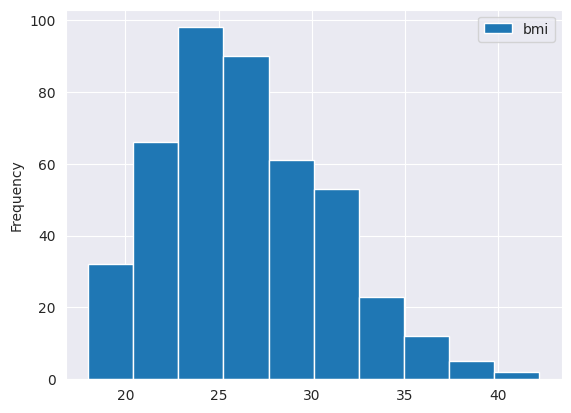

In [51]:
X_diabet.plot.hist();

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
X_diabet = pd.DataFrame(scaler.fit_transform(X_diabet), columns=X_diabet.columns, index=X_diabet.index)

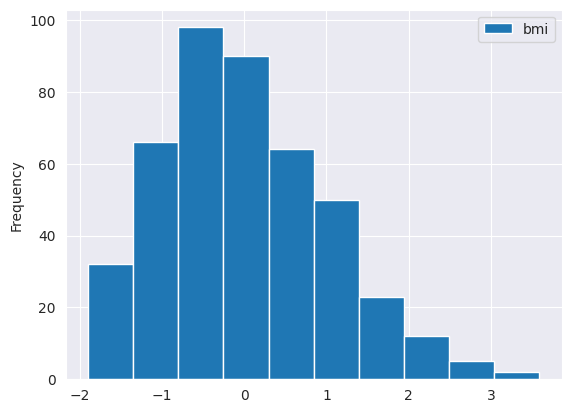

In [54]:
X_diabet.plot.hist(); 

## 4.2 задание

в датасете ты можешь увидеть, что некоторые столбцы содержат значения да/нет. Но нейросеть может работать только с числовыми данными. Необходимо все значения `да` заменить на `1`, а значения `нет` - на `0`. Также заменим пропуски ( `-` ) на `0`

In [55]:
X = X.replace({'Да': 1, 'Нет': 0, '-': 0})

стандартизируйте входные данные и запишите их в переменную `X`

In [56]:
# твой код

In [57]:
# твой код

## 5.1 разделение данных на обучающие и тестовые

суть разделения данных на обучающие и тестовые заключается в том, чтобы использовать обучающие данные для настройки и обучения модели, а тестовые данные — для независимой оценки качества и точности этой модели, что позволяет убедиться в её способности обобщать на новых, ранее не встречавшихся данных.

In [35]:
from sklearn.model_selection import train_test_split

In [67]:
X_train_diabet, X_test_diabet, y_train_diabet, y_test_diabet = train_test_split(
    X_diabet, Y_diabet, test_size=0.2, random_state=21
)

In [68]:
X_train_diabet.shape

(353, 1)

In [69]:
X_test_diabet.shape

(89, 1)

## 5.2 задание

Раздели итоговый датасет по ученикам на train и test выборки. Разделение проведи с параметрами `test_size=0.2`, `random_state=21`. 
Выведи размерности переменных `X_train` и `X_test`. **Важно: не забудь, что необходимо использовать стандартизированные данные**

In [89]:
# твой код

In [ ]:
# твой код

In [ ]:
# твой код

In [ ]:
# твой код

## 6.1 линейная и логистическая регрессии

Линейная регрессия — это метод, который помогает предсказывать результаты на основе данных. Представь, что у тебя есть информация о том, сколько времени ты тратишь на подготовку к урокам и какие оценки ты получаешь. С помощью линейной регрессии можно построить прямую линию, которая покажет, как твои оценки зависят от времени подготовки.

Логистическая регрессия — это инструмент, который помогает предсказать вероятность какого-то события. Например, если мы хотим узнать, заплатит ли человек по кредиту или нет, логистическая регрессия поможет нам оценить, насколько вероятно, что он вернёт деньги. Она работает так: мы берём разные факторы, которые могут повлиять на событие (например, доход человека, его возраст и т. д.), и используем их, чтобы рассчитать вероятность. Результат логистической регрессии — это число между 0 и 1, которое показывает, насколько вероятно событие. Если результат близок к 1, событие скорее всего произойдёт, а если к 0 — вряд ли.

В библиотеке sklearn уже есть готовая реализация алгоритмов `LinearRegression` и `LogisticRegression`.

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [80]:
clf_diabet = LinearRegression().fit(X_train_diabet, y_train_diabet) # Обучим модель.

In [81]:
pred_diabet = clf_diabet.predict(X_test_diabet) # Делаем предсказание модели на тестовой выборке.

In [82]:
mean_absolute_error(pred_diabet, y_test_diabet) 

54.25072743096797

## 6.2 задание

обучи модель предсказывать, поступит ли человек в вуз. Используй метод логистической регрессии (`LogisticRegression`). Выведи конечную точность модели с помощью `mean_absolute_error`

In [ ]:
# ваш код

In [ ]:
# ваш код

In [ ]:
# ваш код

In [ ]:
# ваш код

In [ ]:
# ваш код

In [ ]:
# ваш код

In [ ]:
# ваш код